In [26]:
#importing necessary modules
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
import seaborn as sns 
import joblib
sns.set(style="darkgrid")

In [3]:
#importing database and read the 5 firt lines
data = pd.read_csv("C:/Users/diadi/datasets/kc_house_data.csv", parse_dates=['date'])
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print("data shape:",data.shape)
print("the number of unique Id:",len(data['id'].unique()) )

data shape: (21613, 21)
the number of unique Id: 21436


In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:>

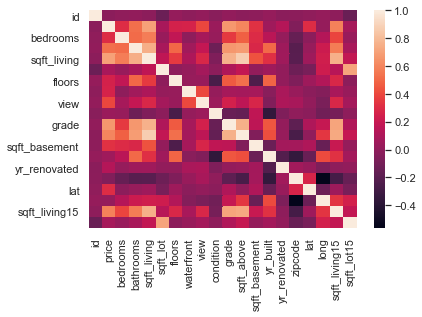

In [8]:
numeric_data = ['id','price','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
numeric_analysis = pd.DataFrame(data[numeric_data]).corr()
sns.heatmap(numeric_analysis)

In [9]:
corr_matrix = data.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

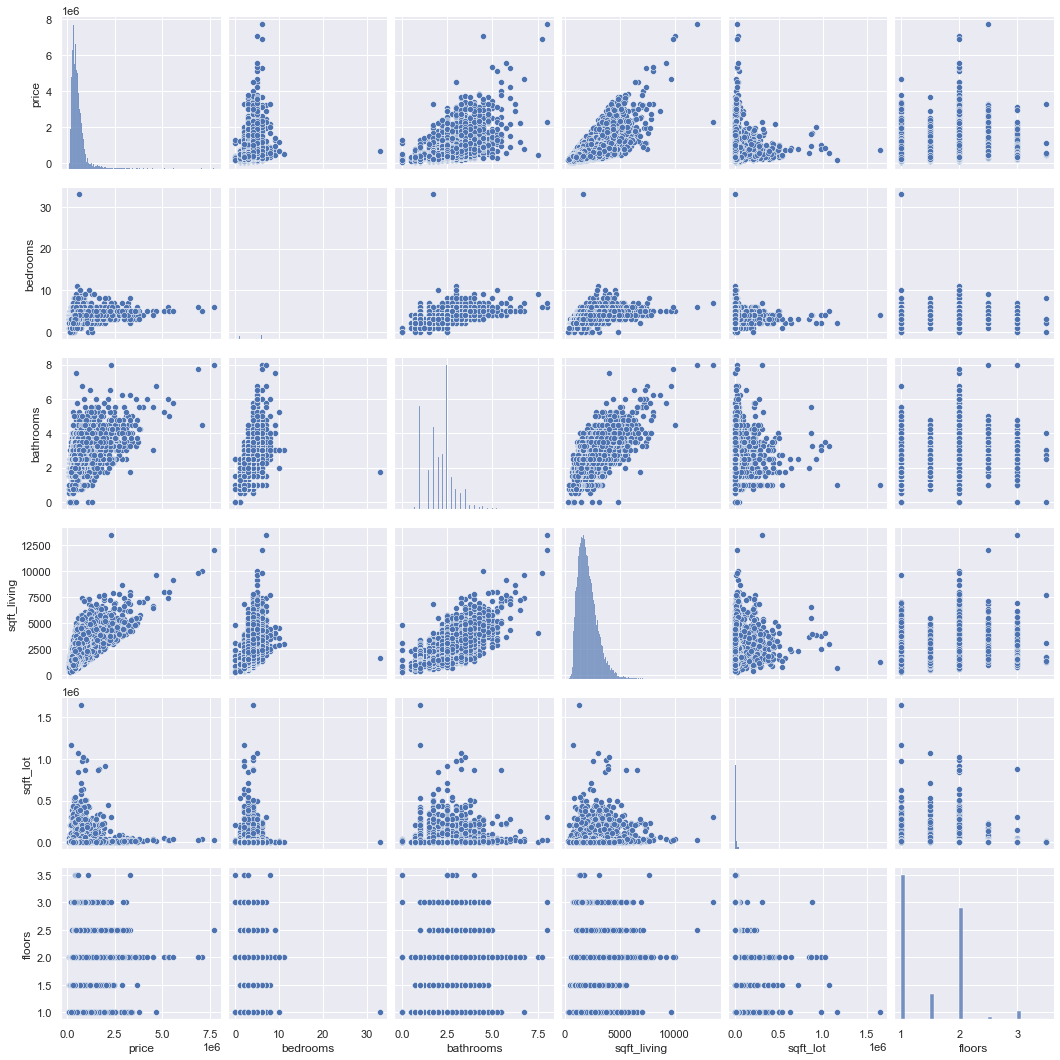

In [10]:
sns.pairplot(data[['price','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors']])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [13]:
#feature selection:
rf_reg1=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features=None,max_leaf_nodes=20000, min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=14, n_jobs=1,
            oob_score=False, random_state=15325, verbose=0,
            warm_start=False)
rf_reg1.fit(data.drop(["date","id","price"], axis=1), data["price"])
indices = np.argsort(rf_reg1.feature_importances_)[::-1]
max_col=10

features =[str(s) for s in data.drop(["date","id","price"], axis=1).columns[indices][:max_col]]

In [14]:
features

['grade',
 'sqft_living',
 'lat',
 'long',
 'sqft_living15',
 'yr_built',
 'waterfront',
 'sqft_above',
 'zipcode',
 'view']

In [15]:
y_data = data['price']
x_data = data [features]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17290, 10), (4323, 10), (17290,), (4323,))

In [18]:
x_train.head()

,grade,sqft_living,lat,long,sqft_living15,yr_built,waterfront,sqft_above,zipcode,view
7291,7,2190,47.5033,-122.232,2180,1953,0,1390,98178,2
14835,9,2370,47.6503,-122.366,1590,1987,0,2370,98119,0
15880,7,1230,47.6797,-122.292,1610,1928,0,1230,98115,0
8812,9,2510,47.5973,-122.177,3110,1967,0,2200,98005,0
17220,6,1160,47.7024,-122.359,1800,1917,0,1160,98177,0


In [22]:
#define a custom error function
def Errorabsvec(y, pred):
    yec=np.abs(np.array(y)-np.array(pred))
    return np.sum(yec)/np.sum(y)

In [20]:
model=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
        max_features=None, max_leaf_nodes=20000,
        min_impurity_decrease=0.0, min_impurity_split=None,
        min_samples_leaf=1, min_samples_split=10,
        min_weight_fraction_leaf=0.0, n_estimators=14, n_jobs=1,
        oob_score=False, random_state=15325, verbose=0,
        warm_start=False)
model.fit(x_train ,np.log(y_train+1))

RandomForestRegressor(max_features=None, max_leaf_nodes=20000,
                      min_samples_split=10, n_estimators=14, n_jobs=1,
                      random_state=15325)

In [21]:
ypred=np.round(np.exp(model.predict(x_test))-1,3)

In [25]:
print("The test error:", str(np.round(Errorabsvec(y_test, ypred)*100,2))+ '%' )

The test error: 13.98%


In [27]:
#Save the model on a picle file using joblib
joblib.dump(model,'C:/Users/diadi/datasets/random_forest_model.pkl')

['C:/Users/diadi/datasets/random_forest_model.pkl']